# Recent paper (Seq2seq, Attention) toy example 과제_17101971이예빈

## SimpleRNN

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [2]:
from keras.layers import SimpleRNN

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN

#각 타임스텝의 출력을 모은 전체 시퀀스를 반환
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))  #층 개수
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [4]:
#입력 시퀀스에 대한 마지막 출력만 반환
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


### IMDB 영화 리뷰 분류 문제

In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [6]:
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 14s 87ms/step - loss: 0.5945 - acc: 0.6769 - val_loss: 0.4425 - val_acc: 0.8152
Epoch 2/10
157/157 [==============================] - 13s 85ms/step - loss: 0.3634 - acc: 0.8522 - val_loss: 0.5278 - val_acc: 0.7324
Epoch 3/10
157/157 [==============================] - 13s 85ms/step - loss: 0.2753 - acc: 0.8911 - val_loss: 0.5016 - val_acc: 0.7596
Epoch 4/10
157/157 [==============================] - 14s 86ms/step - loss: 0.2140 - acc: 0.9193 - val_loss: 0.4831 - val_acc: 0.7830
Epoch 5/10
157/157 [==============================] - 13s 85ms/step - loss: 0.1619 - acc: 0.9399 - val_loss: 0.4138 - val_acc: 0.8348
Epoch 6/10
157/157 [==============================] - 14s 87ms/step - loss: 0.1143 - acc: 0.9588 - val_loss: 0.4903 - val_acc: 0.8458
Epoch 7/10
157/157 [==============================] - 14s 88ms/step - loss: 0.0749 - acc: 0.9772 - val_loss: 0.5123 - val_acc: 0.8028
Epoch 8/10
157/157 [==============================] - 14s 87ms

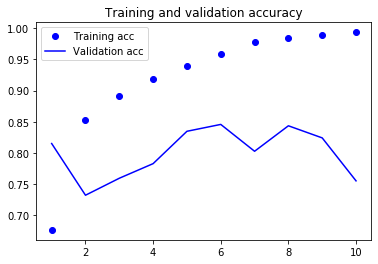

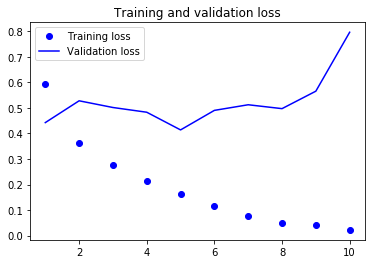

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM
### IMDB 영화 리뷰 분류 문제

In [8]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 29s 185ms/step - loss: 0.5098 - acc: 0.7581 - val_loss: 0.4106 - val_acc: 0.8358
Epoch 2/10
157/157 [==============================] - 25s 161ms/step - loss: 0.2924 - acc: 0.8879 - val_loss: 0.2884 - val_acc: 0.8820
Epoch 3/10
157/157 [==============================] - 25s 160ms/step - loss: 0.2337 - acc: 0.9142 - val_loss: 0.3044 - val_acc: 0.8800
Epoch 4/10
157/157 [==============================] - 25s 161ms/step - loss: 0.2011 - acc: 0.9265 - val_loss: 0.2868 - val_acc: 0.8936
Epoch 5/10
157/157 [==============================] - 25s 159ms/step - loss: 0.1736 - acc: 0.9369 - val_loss: 0.3412 - val_acc: 0.8876
Epoch 6/10
157/157 [==============================] - 25s 158ms/step - loss: 0.1573 - acc: 0.9451 - val_loss: 0.3922 - val_acc: 0.8332
Epoch 7/10
157/157 [==============================] - 24s 156ms/step - loss: 0.1378 - acc: 0.9524 - val_loss: 0.3419 - val_acc: 0.8882
Epoch 8/10
157/157 [==============================] - 2

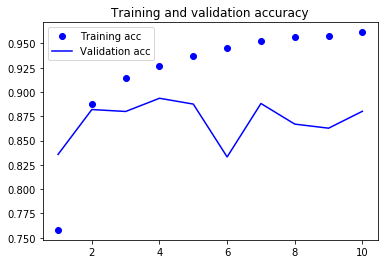

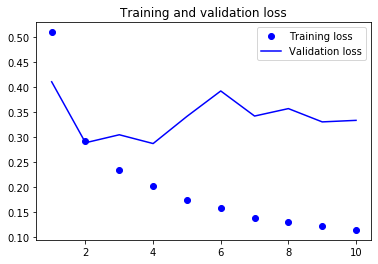

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## CNN
### 1D 컨브넷_IMDB 영화 리뷰 분류 문제

In [10]:
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

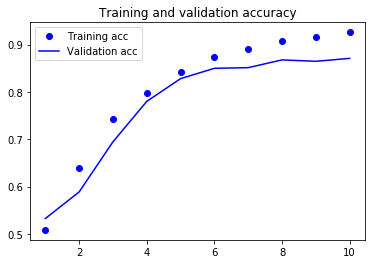

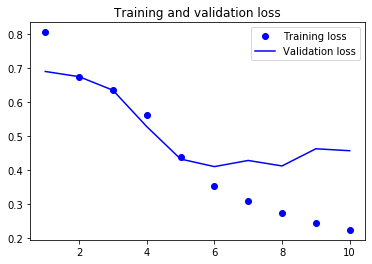

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 1D 컨브넷_기온 예측 문제

In [12]:
import os
import numpy as np

data_dir = './datasets/'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values
    
mean = float_data[:200000].mean(axis=0)
float_data -= mean
std = float_data[:200000].std(axis=0)
float_data /= std

def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets
        
lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

# 전체 검증 세트를 순회하기 위해 val_gen에서 추출할 횟수
val_steps = (300000 - 200001 - lookback) // batch_size

# 전체 테스트 세트를 순회하기 위해 test_gen에서 추출할 횟수
test_steps = (len(float_data) - 300001 - lookback) // batch_size

In [13]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
500/500 [==============================] - 15s 29ms/step - loss: 0.4209 - val_loss: 0.4313
Epoch 2/20
500/500 [==============================] - 15s 29ms/step - loss: 0.3653 - val_loss: 0.4381
Epoch 3/20
500/500 [==============================] - 15s 30ms/step - loss: 0.3385 - val_loss: 0.4557
Epoch 4/20
500/500 [==============================] - 15s 30ms/step - loss: 0.3186 - val_loss: 0.4422
Epoch 5/20
500/500 [==============================] - 16s 31ms/step - loss: 0.3068 - val_loss: 0.4484
Epoch 6/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2983 - val_loss: 0.4466
Epoch 7/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2884 - val_loss: 0.4685
Epoch 8/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2834 - val_loss: 0.4572
Epoch 9/20
500/500 [==============================] - 15s 30ms/step - loss: 0.2772 - val_loss: 0.4516
Epoch 

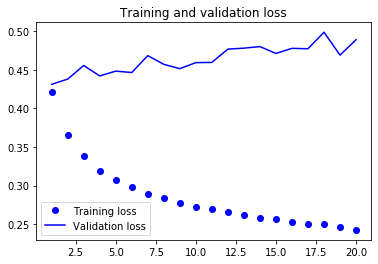

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1D 컨브넷을 RNN이전 전처리 단계로 사용: step수 절반으로 줄임

In [15]:
# 이전에는 6이었습니다(시간마다 1 포인트); 이제는 3 입니다(30분마다 1 포인트)
step = 3
lookback = 1440  # 변경 안 됨
delay = 144 # 변경 안 됨

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step)
val_steps = (300000 - 200001 - lookback) // 128
test_steps = (len(float_data) - 300001 - lookback) // 128

In [16]:
model = Sequential()
model.add(layers.Conv1D(32, 5, activation='relu',
                        input_shape=(None, float_data.shape[-1])))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation='relu'))
model.add(layers.GRU(32, dropout=0.1, recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.summary()

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, None, 32)          2272      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, None, 32)          0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 32)          5152      
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 13,793
Trainable params: 13,793
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
500/500 [==============================] - 76s 152ms/step - loss: 0.3324 - val_loss: 0.2782
Epoch 2/20
50

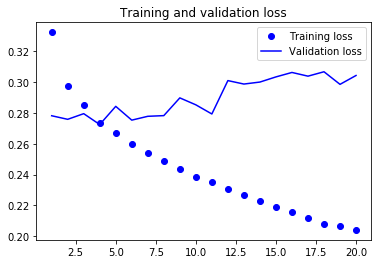

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## GRU
### 기온 예측 문제

In [18]:
model = Sequential()
model.add(layers.GRU(32, input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/20
500/500 [==============================] - 95s 190ms/step - loss: 0.2985 - val_loss: 0.2803
Epoch 2/20
500/500 [==============================] - 94s 189ms/step - loss: 0.2842 - val_loss: 0.2645
Epoch 3/20
500/500 [==============================] - 94s 187ms/step - loss: 0.2780 - val_loss: 0.2648
Epoch 4/20
500/500 [==============================] - 94s 188ms/step - loss: 0.2742 - val_loss: 0.2599
Epoch 5/20
500/500 [==============================] - 94s 187ms/step - loss: 0.2702 - val_loss: 0.2628
Epoch 6/20
500/500 [==============================] - 94s 189ms/step - loss: 0.2672 - val_loss: 0.2669
Epoch 7/20
500/500 [==============================] - 94s 188ms/step - loss: 0.2617 - val_loss: 0.2647
Epoch 8/20
500/500 [==============================] - 94s 188ms/step - loss: 0.2613 - val_loss: 0.2647
Epoch 9/20
500/500 [==============================] - 94s 189ms/step - loss: 0.2567 - val_loss: 0.2654
Epoch 10/20
500/500 [==============================] - 94s 188ms/step - l

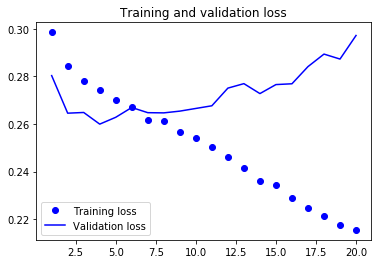

In [19]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

순환 드롭아웃 사용

In [20]:
model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.2,
                     input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 163s 326ms/step - loss: 0.3221 - val_loss: 0.2768
Epoch 2/40
500/500 [==============================] - 161s 322ms/step - loss: 0.3022 - val_loss: 0.2754
Epoch 3/40
500/500 [==============================] - 161s 321ms/step - loss: 0.2948 - val_loss: 0.2675
Epoch 4/40
500/500 [==============================] - 161s 322ms/step - loss: 0.2898 - val_loss: 0.2700
Epoch 5/40
500/500 [==============================] - 162s 324ms/step - loss: 0.2878 - val_loss: 0.2659
Epoch 6/40
500/500 [==============================] - 162s 324ms/step - loss: 0.2854 - val_loss: 0.2681
Epoch 7/40
500/500 [==============================] - 161s 321ms/step - loss: 0.2816 - val_loss: 0.2637
Epoch 8/40
500/500 [==============================] - 162s 325ms/step - loss: 0.2781 - val_loss: 0.2640
Epoch 9/40
500/500 [==============================] - 161s 323ms/step - loss: 0.2764 - val_loss: 0.2674
Epoch 10/40
500/500 [==============================] - 162s 325m

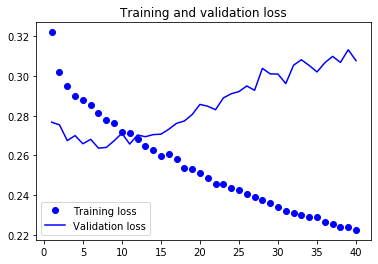

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## 양방향 RNN
### 기온 예측 문제

Bidrectional 사용

In [23]:
from tensorflow.keras import backend as K
K.clear_session()

In [24]:
model = Sequential()
model.add(layers.Bidirectional(layers.GRU(32), input_shape=(None, float_data.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 121s 243ms/step - loss: 0.2992 - val_loss: 0.2726
Epoch 2/40
500/500 [==============================] - 120s 240ms/step - loss: 0.2731 - val_loss: 0.2674
Epoch 3/40
500/500 [==============================] - 120s 240ms/step - loss: 0.2690 - val_loss: 0.2646
Epoch 4/40
500/500 [==============================] - 120s 240ms/step - loss: 0.2637 - val_loss: 0.2676
Epoch 5/40
500/500 [==============================] - 120s 240ms/step - loss: 0.2580 - val_loss: 0.2725
Epoch 6/40
500/500 [==============================] - 120s 240ms/step - loss: 0.2541 - val_loss: 0.2654
Epoch 7/40
500/500 [==============================] - 120s 240ms/step - loss: 0.2523 - val_loss: 0.2686
Epoch 8/40
500/500 [==============================] - 120s 240ms/step - loss: 0.2461 - val_loss: 0.2723
Epoch 9/40
500/500 [==============================] - 120s 239ms/step - loss: 0.2414 - val_loss: 0.2763
Epoch 10/40
500/500 [==============================] - 121s 242m

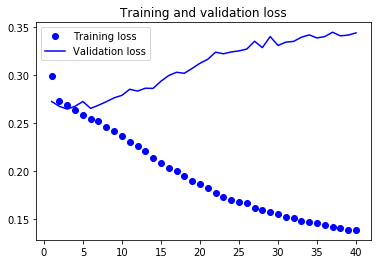

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()